In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [2]:
temp_df=pd.read_csv("Temperature_Forecast.csv")

In [3]:
temp_df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
temp_df.shape

(7752, 25)

In [5]:
temp_df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [6]:
temp_df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [7]:
temp_df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
temp_df.isnull().sum()               #null value present

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [10]:
temp_df=temp_df.drop(columns = ['Date'])

In [11]:
temp_df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [12]:
temp_df = temp_df.dropna().reset_index()

In [13]:
temp_df

index  station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         0      1.0          28.7          21.4    58.255688    91.116364   
1         1      2.0          31.9          21.6    52.263397    90.604721   
2         2      3.0          31.6          23.3    48.690479    83.973587   
3         3      4.0          32.0          23.4    58.239788    96.483688   
4         4      5.0          31.4          21.9    56.174095    90.155128   
...     ...      ...           ...           ...          ...          ...   
7583   7745     21.0          23.1          17.8    24.688997    78.261383   
7584   7746     22.0          22.5          17.4    30.094858    83.690018   
7585   7747     23.0          23.3          17.1    26.741310    78.869858   
7586   7748     24.0          23.3          17.7    24.040634    77.294975   
7587   7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936  6.818887   69.451805  ...   
1            29.850689         24.035009  5.691890   51.937448  ...   
2            30.091292         24.565633  6.138224   20.573050  ...   
3            29.704629         23.326177  5.650050   65.727144  ...   
4            29.113934         23.486480  5.735004  107.965535  ...   
...                ...               ...       ...         ...  ...   
7583         27.812697         18.303014  6.603253    9.614074  ...   
7584         26.704905         17.814038  5.768083   82.146707  ...   
7585         26.352081         18.775678  6.148918   72.058294  ...   
7586         27.010193         18.733519  6.542819   47.241457  ...   
7587         27.939516         18.522965  7.289264    9.090034  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0            0.0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1            0.0         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2            0.0         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3            0.0         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4            0.0         0.0         0.0  37.5507  127.135   35.0380  0.5055   
...          ...         ...         ...      ...      ...       ...     ...   
7583         0.0         0.0         0.0  37.5507  127.040   26.2980  0.5721   
7584         0.0         0.0         0.0  37.5102  127.086   21.9668  0.1332   
7585         0.0         0.0         0.0  37.5372  126.891   15.5876  0.1554   
7586         0.0         0.0         0.0  37.5237  126.909   17.2956  0.2223   
7587         0.0         0.0         0.0  37.5237  126.970   19.5844  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7583      4456.024414       27.6       17.7  
7584      4441.803711       28.0       17.1  
7585      4443.313965       28.3       18.1  
7586      4438.373535       28.6       18.8  
7587      4451.345215       27.8       17.4  

[7588 rows x 25 columns]

In [14]:
temp_df.isnull().sum()

index               0
station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

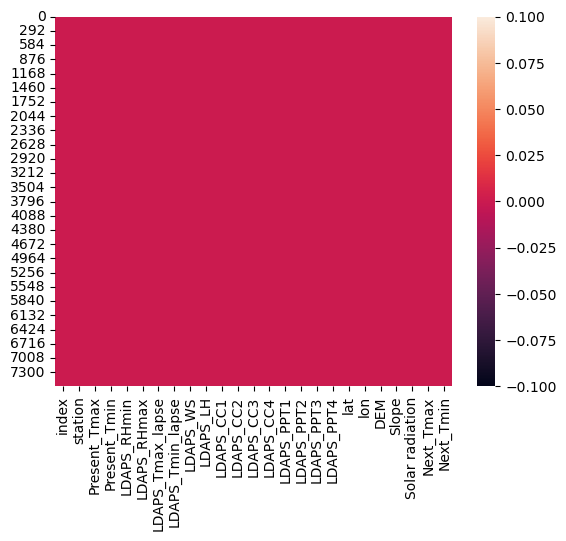

In [15]:
sns.heatmap(temp_df.isnull())   

In [16]:
temp_df=temp_df.drop(columns = ['index'])

In [17]:
temp_df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

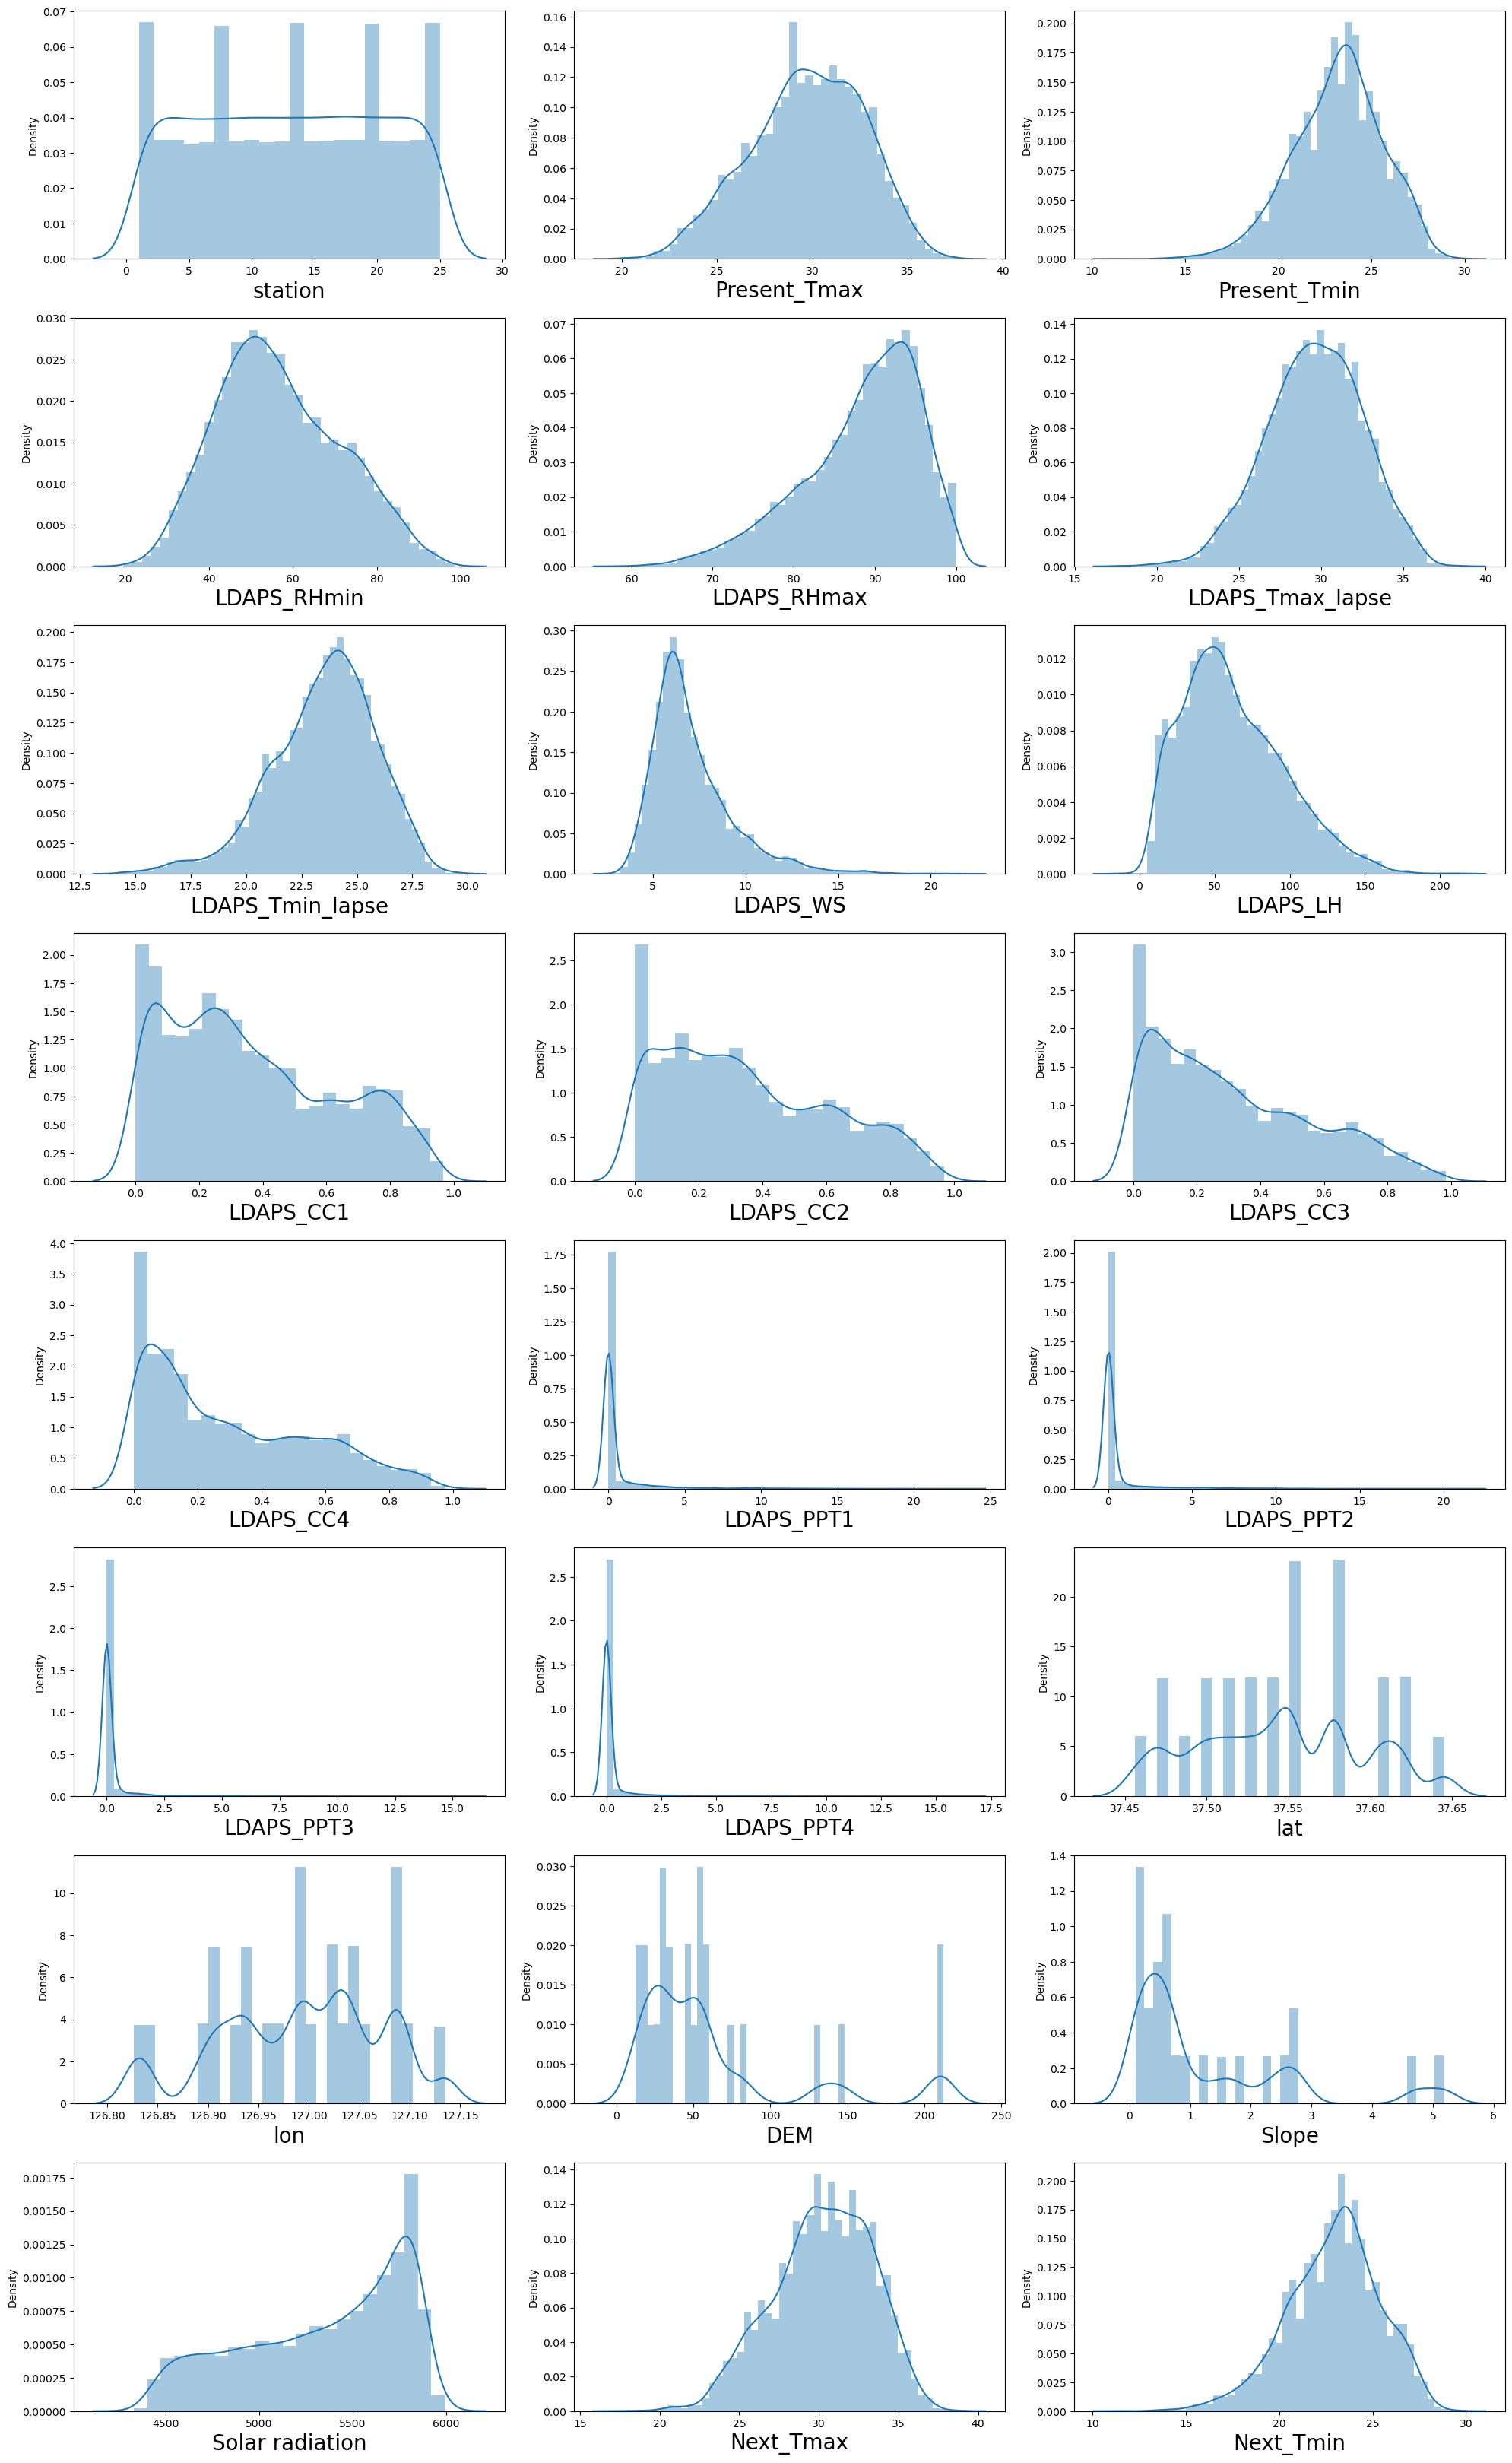

In [18]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in temp_df:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(temp_df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

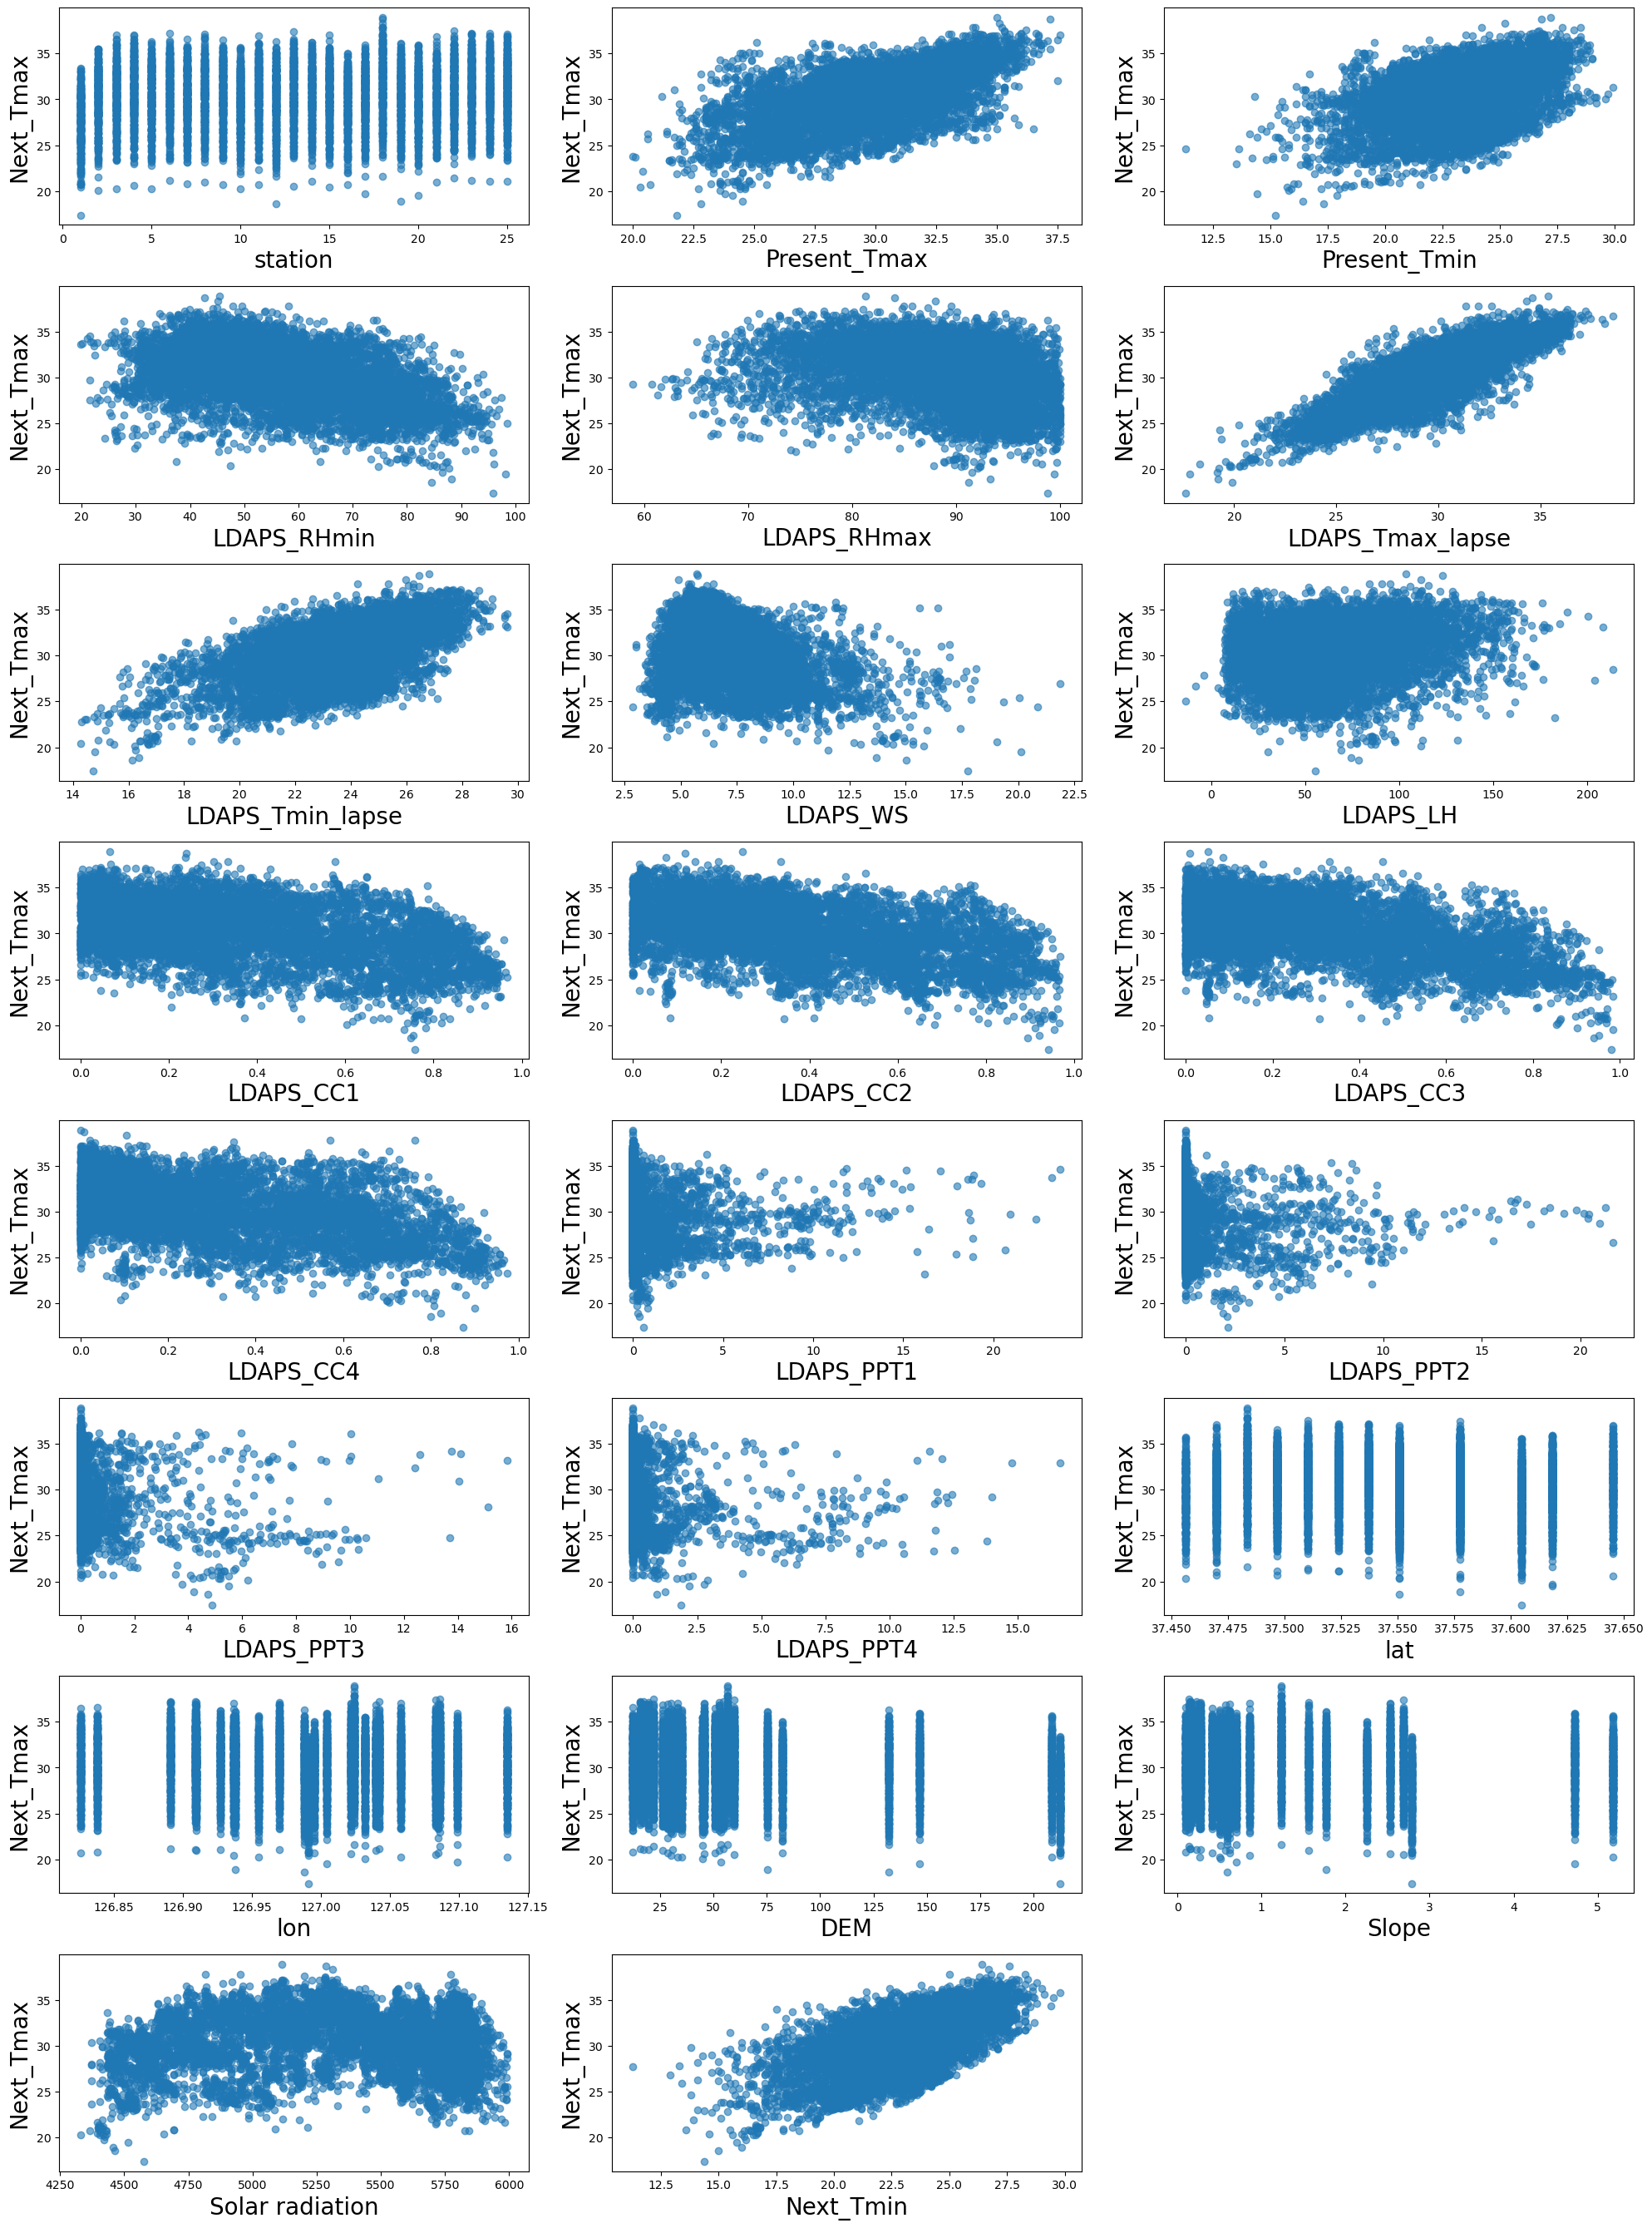

In [19]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in temp_df:
    if column != 'Next_Tmax': 
            ax=plt.subplot(10,3,plotnumber)
            plt.scatter(temp_df[column], temp_df['Next_Tmax'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Next_Tmax', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()



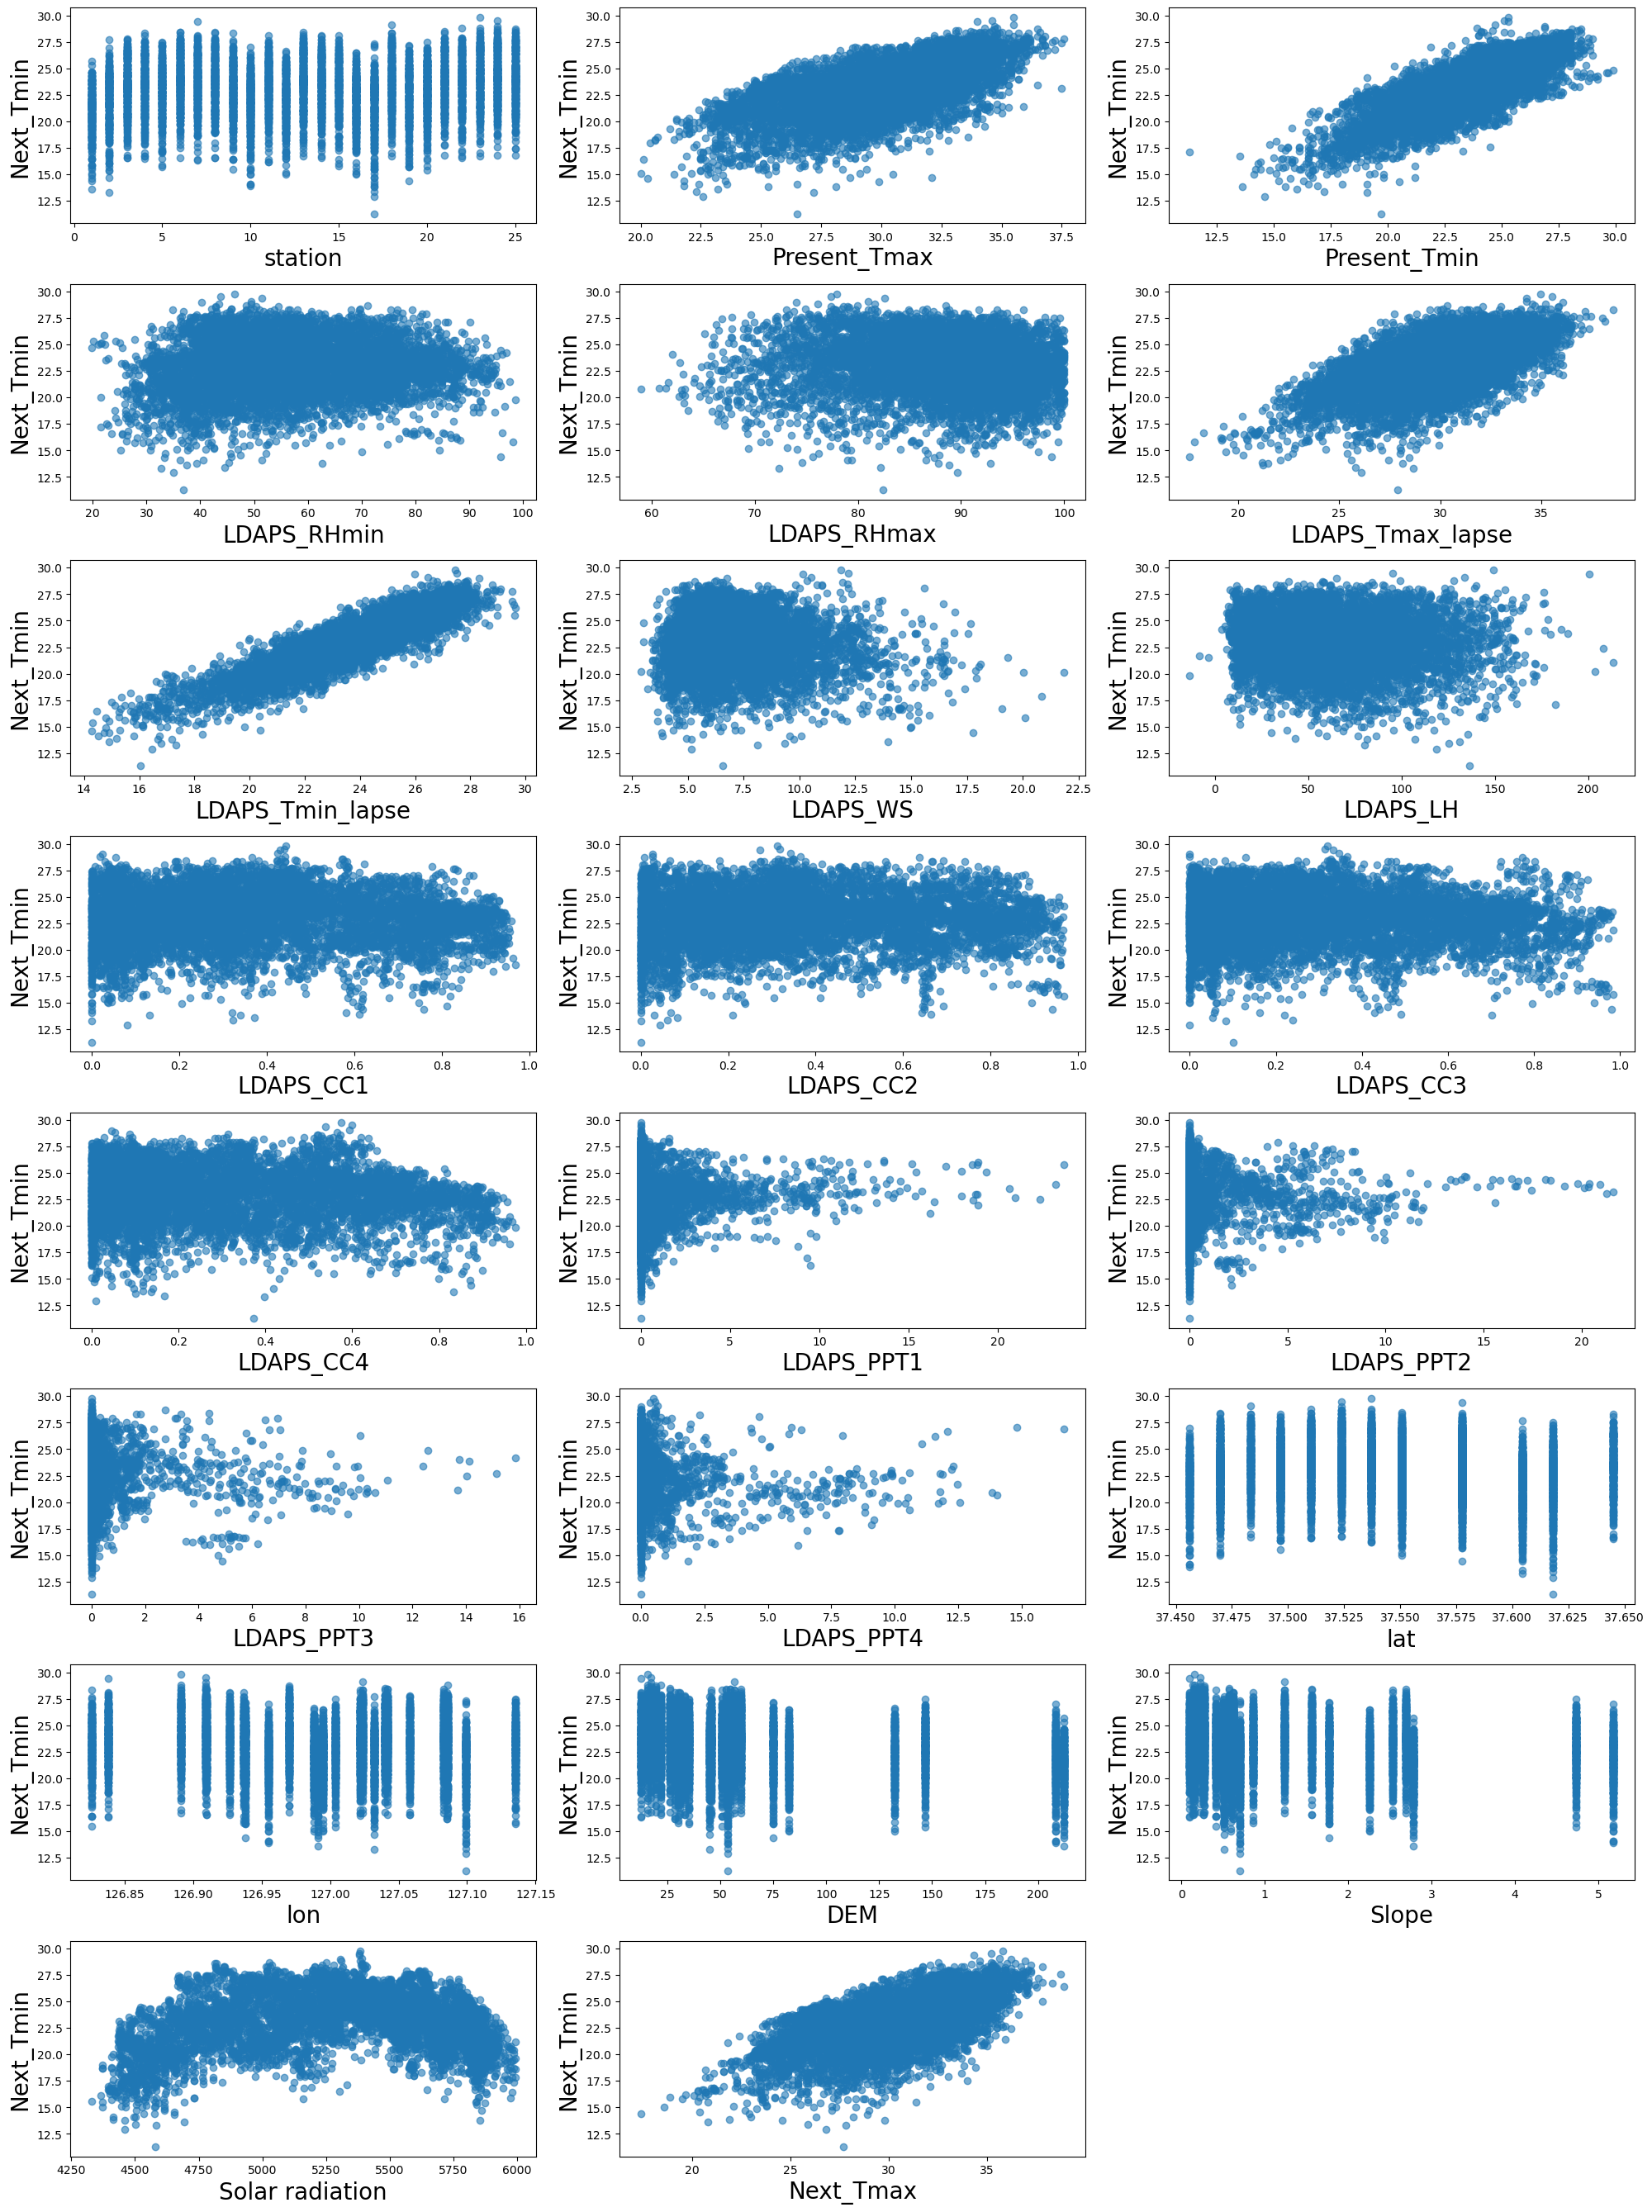

In [20]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in temp_df:
    if column != 'Next_Tmin': 
            ax=plt.subplot(10,3,plotnumber)
            plt.scatter(temp_df[column], temp_df['Next_Tmin'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Next_Tmin', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

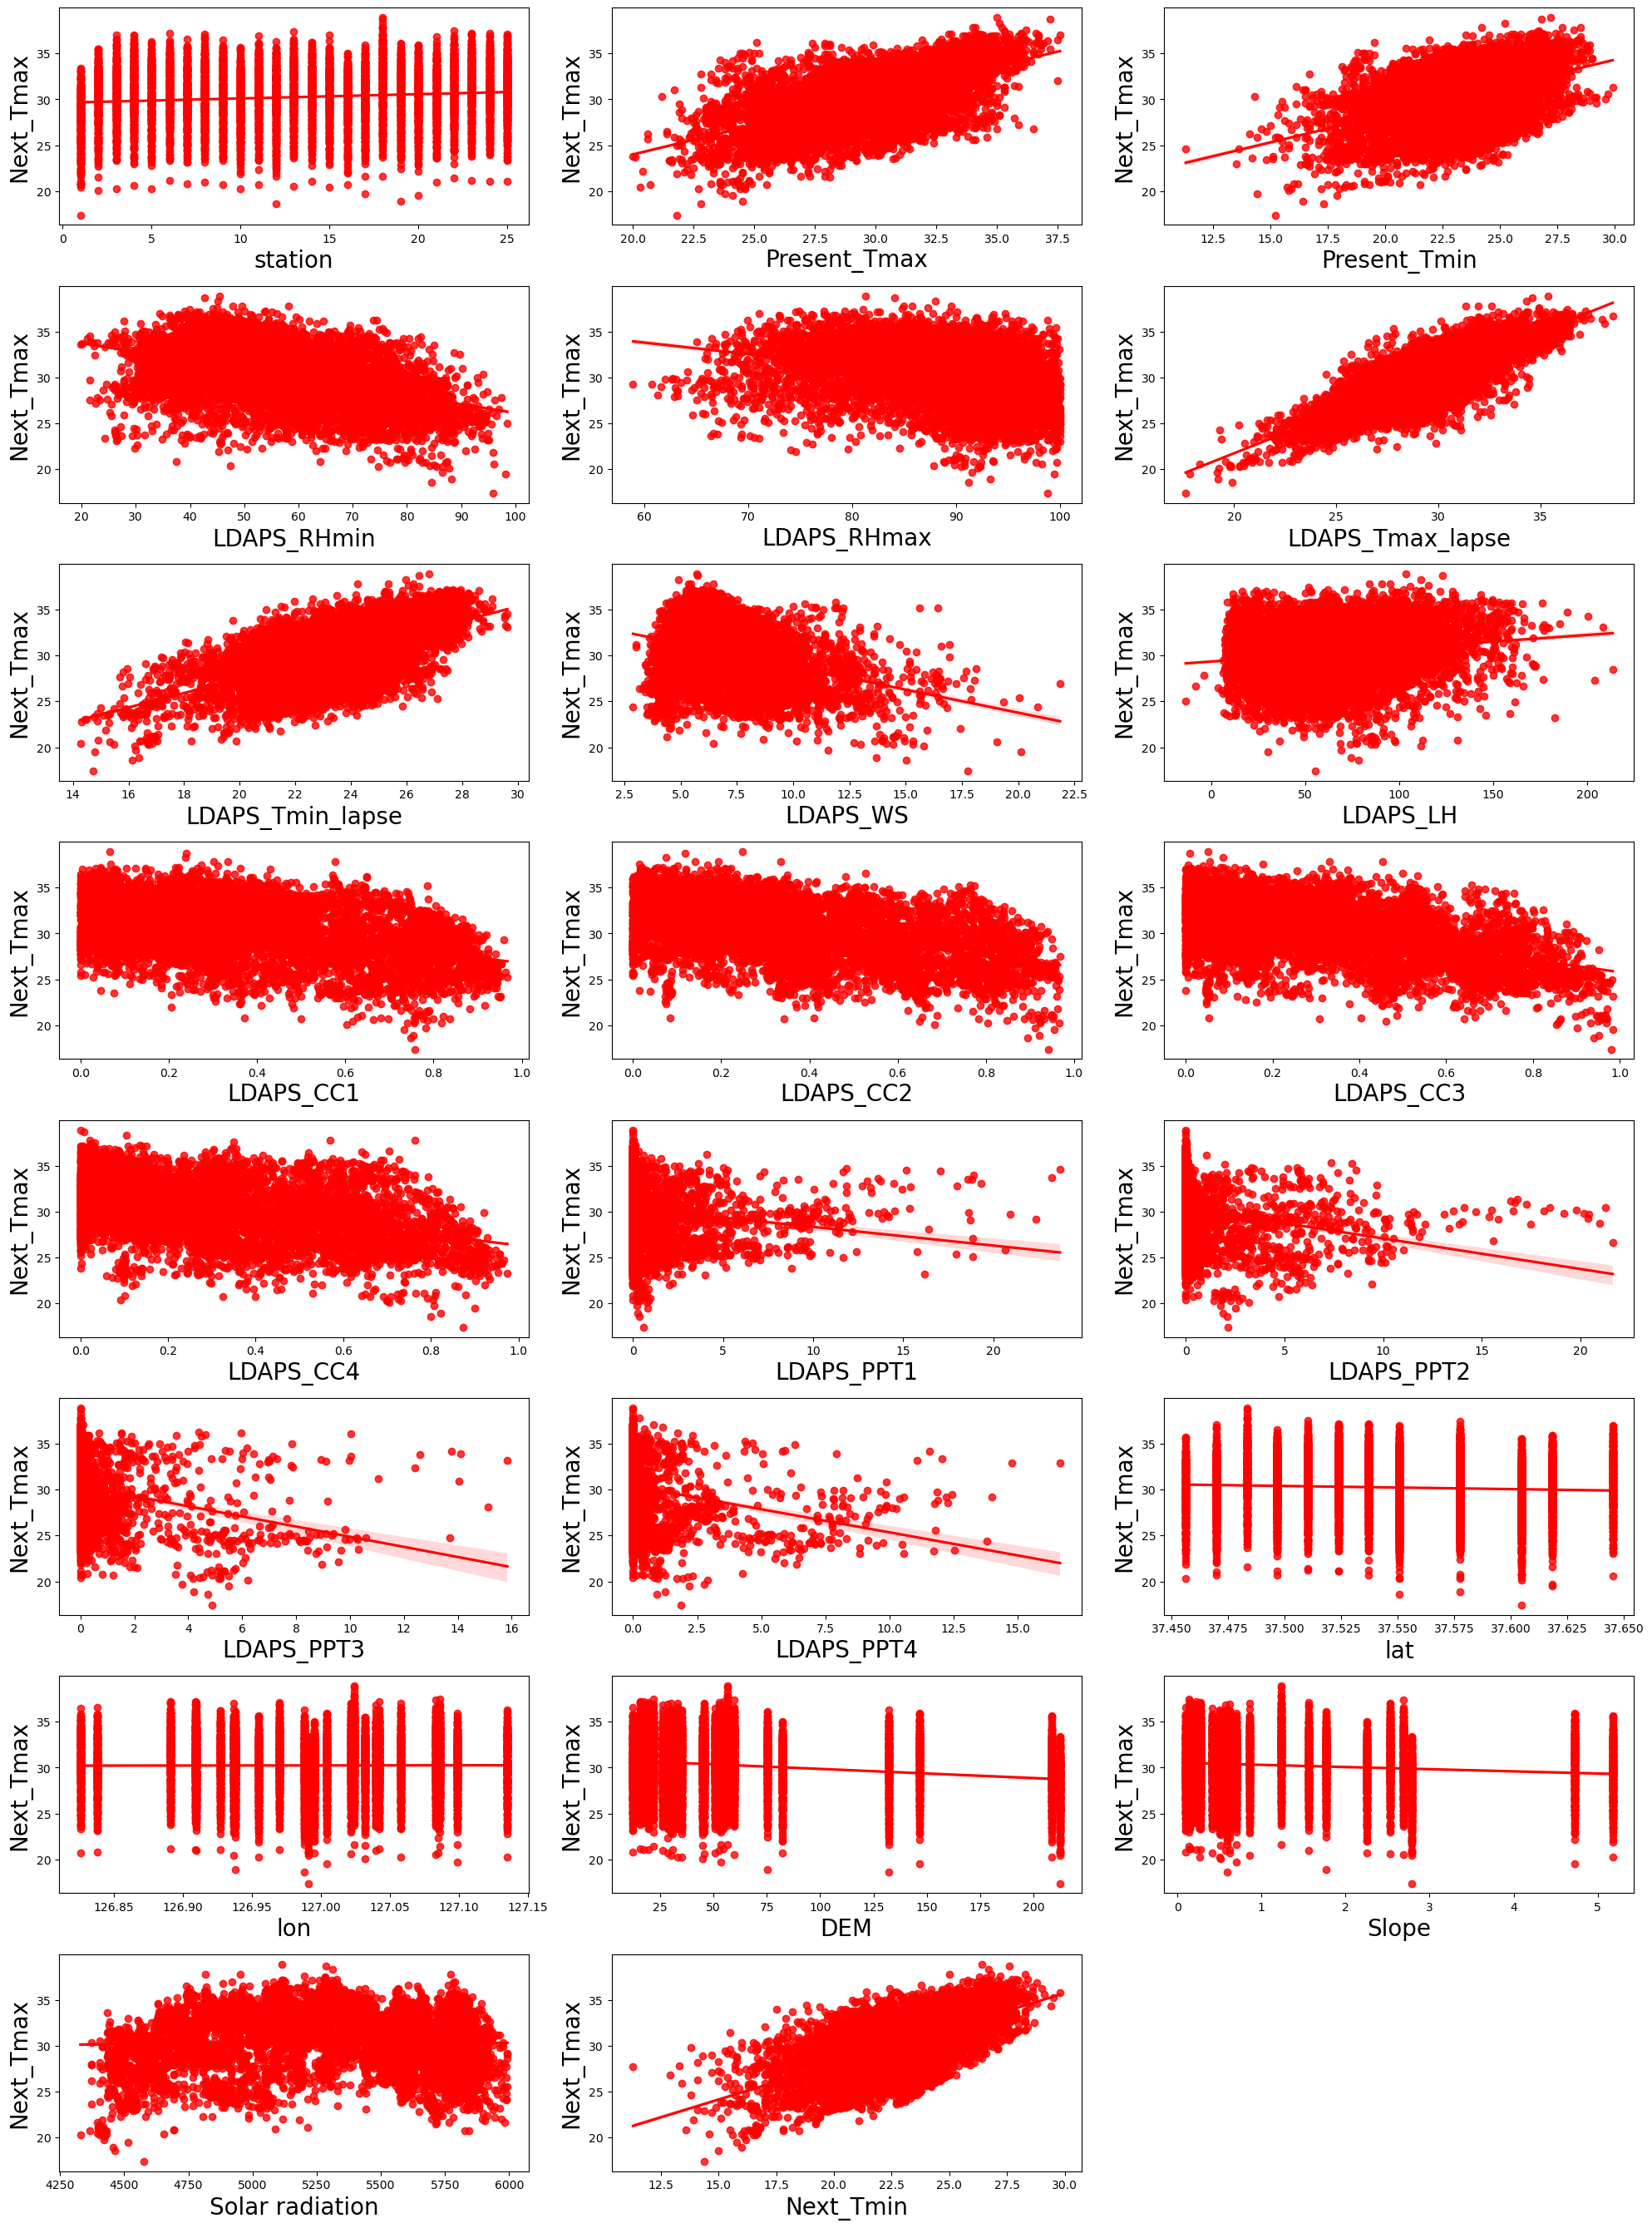

In [21]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in temp_df:
    if column != 'Next_Tmax': 
            ax=plt.subplot(10,3,plotnumber)
            sns.regplot(x=temp_df[column],y=temp_df['Next_Tmax'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Next_Tmax', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()


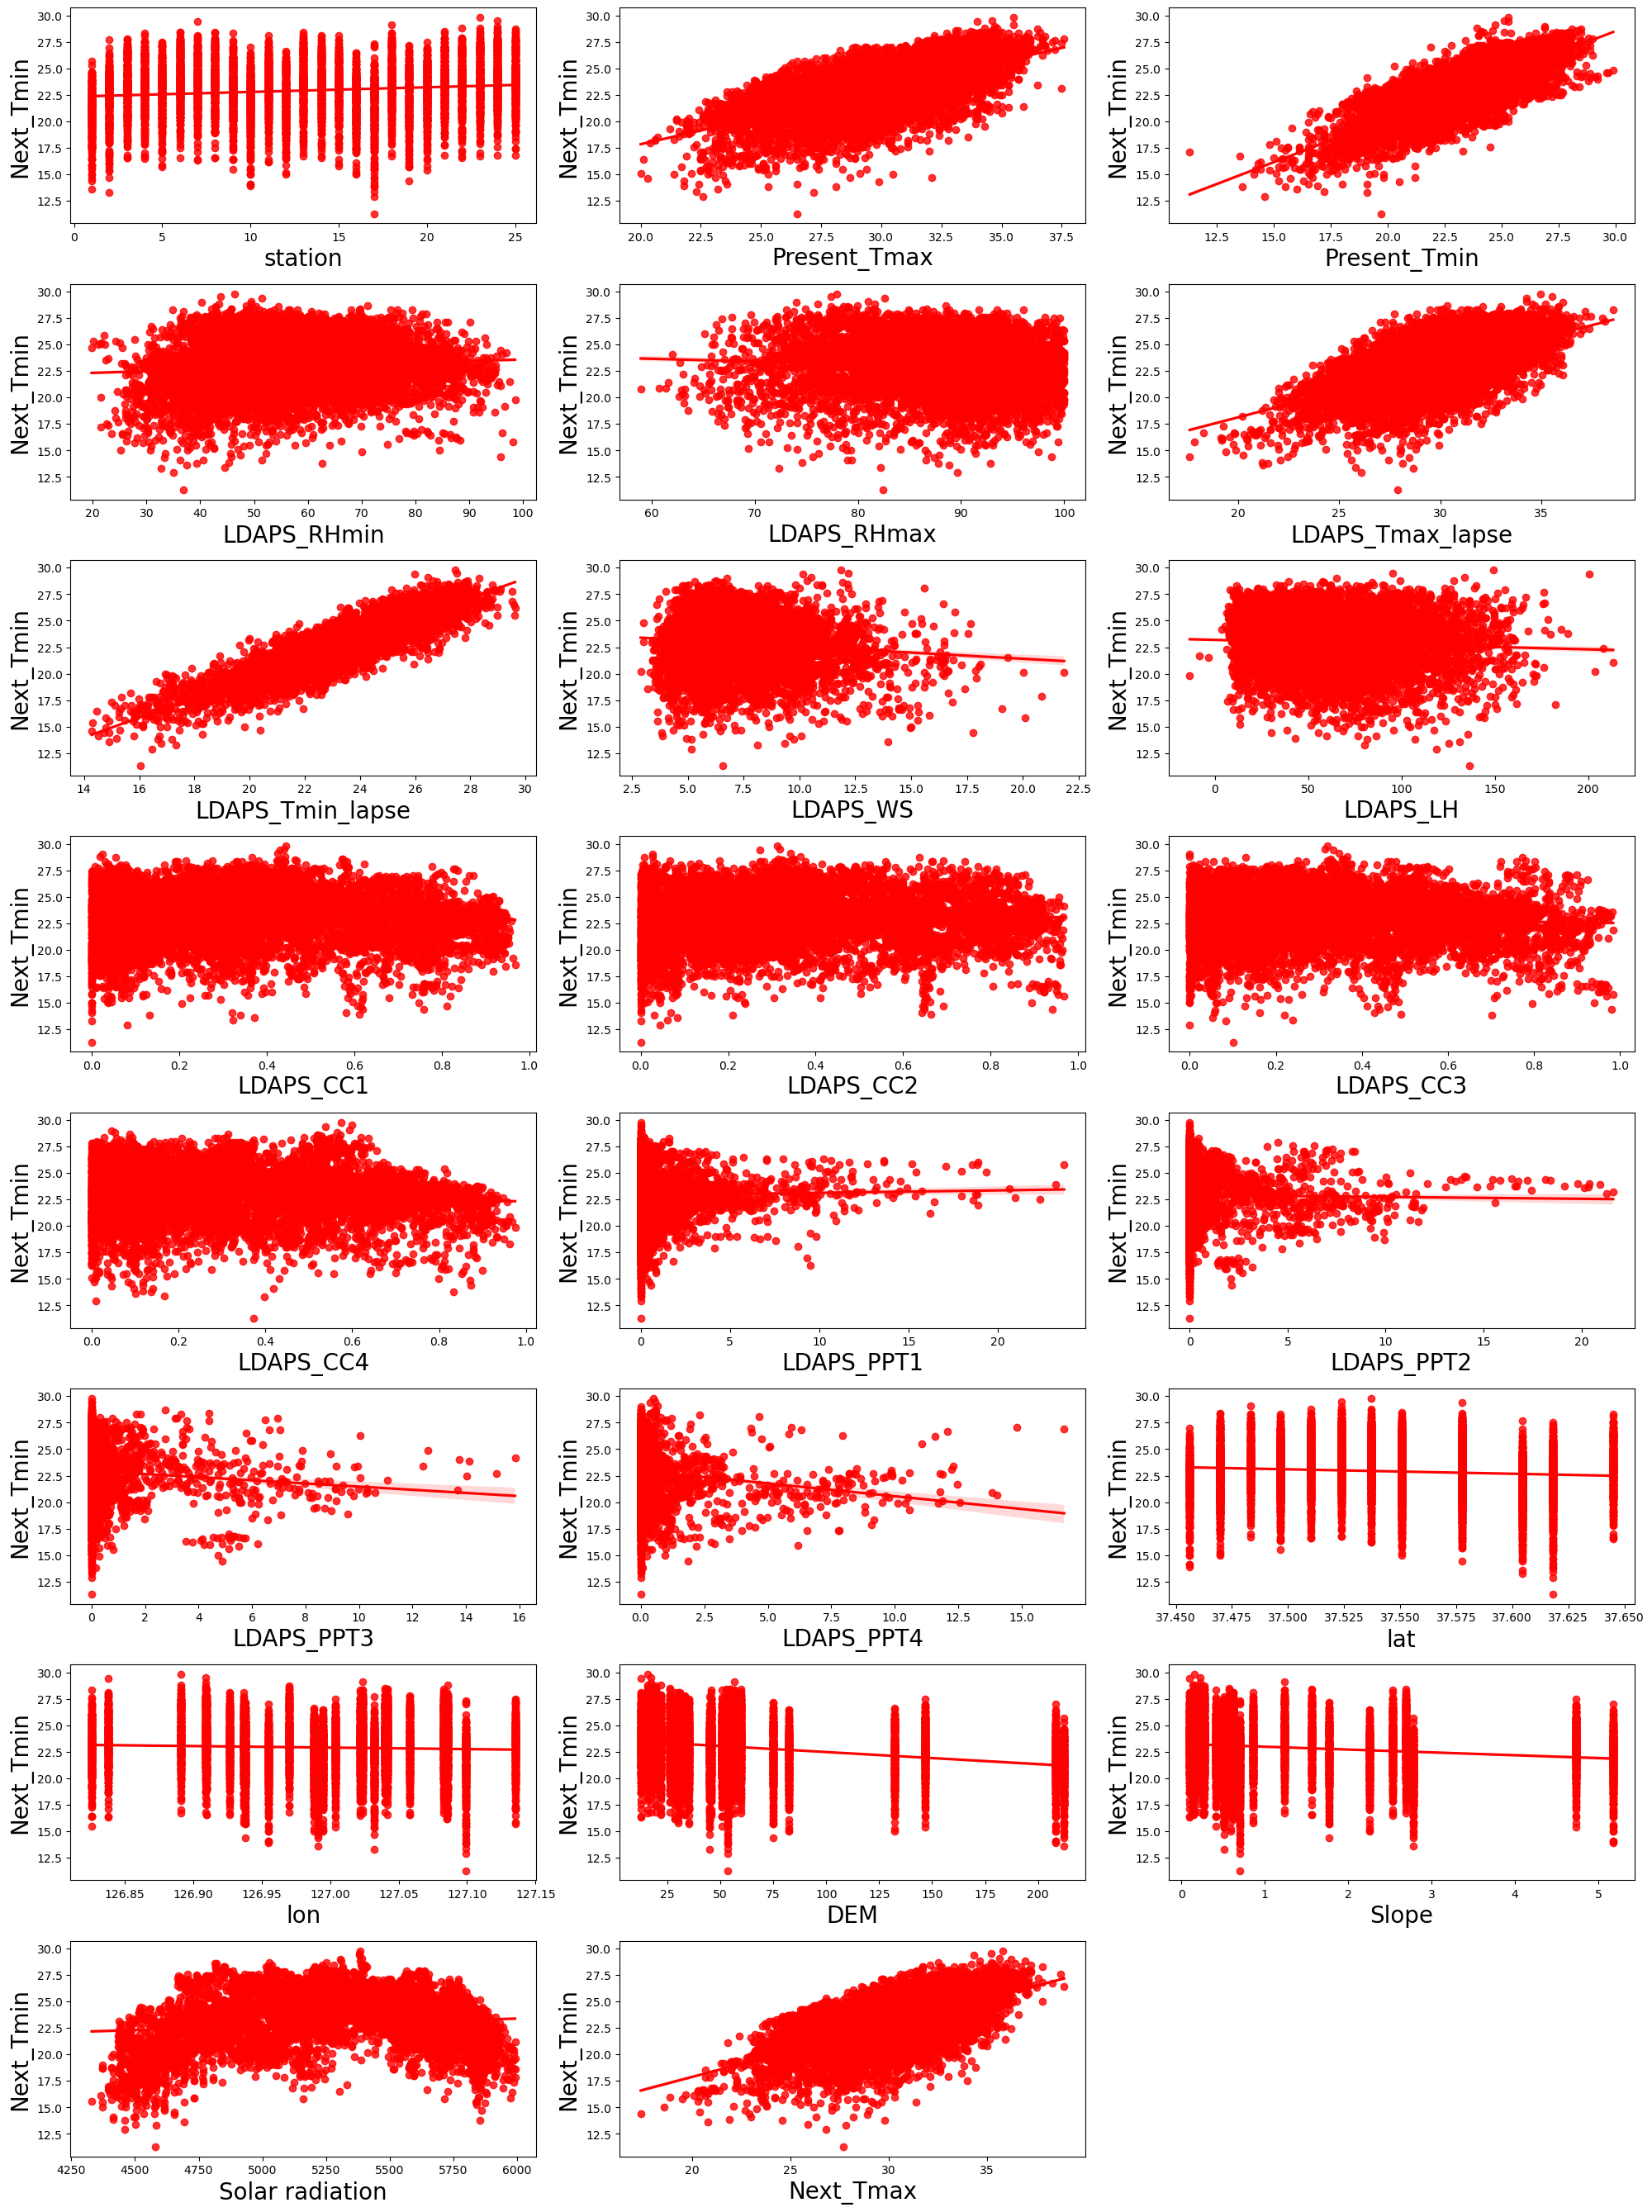

In [22]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in temp_df:
    if column != 'Next_Tmin': 
            ax=plt.subplot(10,3,plotnumber)
            sns.regplot(x=temp_df[column],y=temp_df['Next_Tmin'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Next_Tmin', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

sns.pairplot(temp_df)

In [ ]:
temp_df.plot(kind='box',subplots=True,layout=(6,5),figsize=(10,10))

From the above plots it is observeed that outliers are present in few columns of the dataset.Inorder to remove thoes outliers zscore is imported and as the threshold value for zscore is between -3 to +3 keeping that in mind removing the outliers.

In [ ]:
from scipy.stats import zscore
out_liers=temp_df[['LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_RHmin','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Present_Tmax','Present_Tmin']]
z=np.abs(zscore(out_liers))
z

In [ ]:
np.where(z>3)

In [ ]:
data=temp_df[(z<3).all(axis=1)]
data.shape

In [ ]:
print("dataloss",((temp_df.shape[0]-data.shape[0])/temp_df.shape[0])*100)

The data loss is more than 10 that's why are not dropping the data ang going ahead with olddata set.

Checking the skewness of the data and then removing it by using cuberoot and squareroot method.Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1(positive skewed).

In [ ]:
temp_df.skew().sort_values(ascending=False)

In [ ]:
temp_df[['LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1']]=np.sqrt(temp_df[['LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1']])

In [ ]:
temp_df.skew().sort_values(ascending=False)

In [ ]:
temp_df[['LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1']]=np.cbrt(temp_df[['LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1']])

In [ ]:
temp_df.skew().sort_values(ascending=False)

In [ ]:
temp_df.corr()

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(temp_df.corr(),annot=True) 

Making the data ready for applying various models but diving it into dependent and independent variable. Spliting it in Test and train.

In [ ]:
x = temp_df.drop(['Next_Tmax', 'Next_Tmin'], axis =1)
y_max = temp_df['Next_Tmax']
y_min = temp_df['Next_Tmin']


In [ ]:
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

In [ ]:
x_train, x_test,y_train_max, y_test_max = train_test_split(x, y_max,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_max.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_max.shape)

MODEL BULIDING (Regression model)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Lassocv":LassoCV(),
    "Ridgecv":RidgeCV()
}

In [ ]:
for model_name,model in models.items():
    model.fit(x_train, y_train_max)
    model.score(x_test,y_test_max)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test_max,pred))
    print("Mean squared error",mean_squared_error(y_test_max,pred))
    print("r2 Score on test data",r2_score(y_test_max,pred)*100)  
    print("r2 Score on training data",r2_score(y_train_max,pred1)*100)

All the models above shows R-squared Score on test and train data also Mean absolute error and Mean squared error can be seen. From the above models the best suited model for this dataset is Extra Trees Regressor and Random Forest Regressor model but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [ ]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_max, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [ ]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_max, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

After Cross Valadition Score it is observed that the best suited model is Linear Regression, Lasso and Ridge are working good but we are going head with Linear Regression Model

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train_max)

In [ ]:
param= {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [ ]:
gscv = GridSearchCV(lm, param, cv=5)
gscv.fit(x_train, y_train_max)

In [ ]:
filename="NextTmax_Model_1.pkl"
with open(filename, 'wb') as file:
    pickle.dump(lm, file)
with open(filename, 'rb') as file:
    Final_Model = pickle.load(file)
result = Final_Model.score(x_test, y_test_max)
print(result)

In [ ]:
x_train, x_test,y_train_min, y_test_min = train_test_split(x, y_min,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_min.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_min.shape)

In [ ]:
for model_name,model in models.items():
    model.fit(x_train, y_train_min)
    model.score(x_test,y_test_min)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test_min,pred))
    print("Mean squared error",mean_squared_error(y_test_min,pred))
    print("r2 Score on test data",r2_score(y_test_min,pred)*100)  
    print("r2 Score on training data",r2_score(y_train_min,pred1)*100)

All the models above shows R-squared Score on test and train data also Mean absolute error and Mean squared error can be seen. From the above models the best suited model for this dataset is Extra Trees Regressor and Random Forest Regressor model but still will be further to do cross validation on all the models to select the best suited model the given dataset.

In [ ]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_min, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [ ]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_min, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

After Cross Valadition Score it is observed Extra Tree Regressor and Lassocv models are working good but we are moving ahead with Extra Tree Regressor model.

In [ ]:
ET=ExtraTreesRegressor()

In [ ]:
ET.fit(x_train,y_train_min)

In [ ]:
parameter= {'n_estimators':[200],
            'max_depth':[10],
            'min_samples_split':[5],
            'min_samples_leaf':[2],
            'max_features':['sqrt'],
            'random_state':[42],
            'n_jobs':[-1]}

In [ ]:
grid_GBC = GridSearchCV(ET, parameter,cv=2)
grid_GBC.fit(x_train, y_train_min)

In [ ]:
filename="NextTmin_Model_1.pkl"
with open(filename, 'wb') as file:
    pickle.dump(ET, file)
with open(filename, 'rb') as file:
    Final_Model = pickle.load(file)
result = Final_Model.score(x_test, y_test_min)
print(result)